In [1]:
import os
import requests
import pandas
import base64

from IPython.display import Image, HTML

SERVICE_BASE_URL = 'http://mdstudio-smartcyp.dev.openrisknet.org/'

# Performing SMARTCyp predictions

MDStudio SMARTCyp provides a convenient endpoint to the SMARTCyp software supporting all of the configuration options and, ligand input formats and result formats.

### Requesting information on the installed SMARTCyp version

In [2]:
response = requests.get('{0}/smartcyp_info'.format(SERVICE_BASE_URL))
response.json()

{'citation': 'Rydberg P., Gloriam D.E., Zaretzki J., Breneman C., Olsen L. SMARTCyp:A 2D Method for Prediction of Cytochrome P450-Mediated Drug Metabolism.ACS Med Chem Lett. 2010;1(3):96-100. Published 2010 Mar 15.',
 'models': ['CYP3A4', 'CYP2C9', 'CYP2D6'],
 'version': '2.4.2'}

### Run SMARTCyp starting from a SMILES string

A SMILES string is the default ligand representation accepted as input for SMARTCyp. In addition SMARTCyp accepts 2D and 3D structure formats using the 'mol' parameter (see below). 

Returned results are always wrapped as a JSON object containing the prediction results as either JSON (default), CSV or HTML format. In addition you can request the 1D images normally displayed as part of the HTML output of SMARTCyp to be included in the results (output_png = True). They will be base64 encoded and thus will require decoding first (shown below).

In de example below the prediction results are loaded into a Pandas DataFrame ready for analysis and friendly visualization.

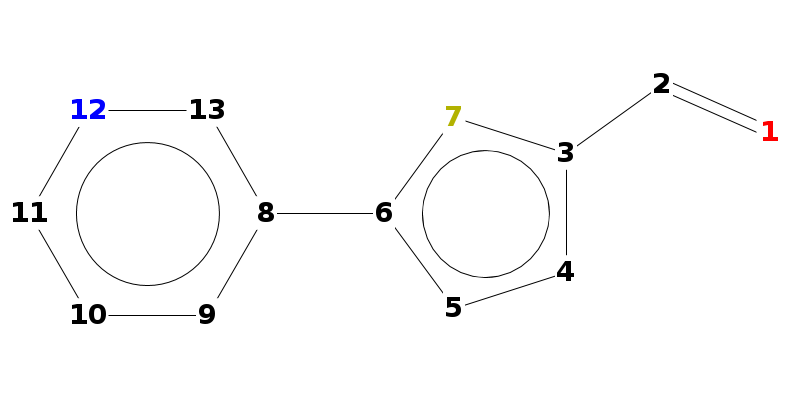

,C.10,C.11,C.13,C.2,C.3,C.4,C.5,C.6,C.8,C.9,N.12,O.1,S.7
2Cranking,6,5,9,1,10,4,7,12,11,8,2,None,3
2Cscore,90.84,90.45,102.55,44.86,1010.57,88.72,94.69,1022.49,1016.54,96.95,80.5,997.23,85.98
2D6ranking,6,5,9,1,10,4,7,12,11,8,2,None,3
2D6score,91.64,90.45,104.15,45.66,1012.17,90.32,97.09,1025.69,1018.94,98.55,81.3,997.23,88.38
2DSASA,34,38.69,31.24,31.01,5.79,29.61,27.87,3.79,4.02,28.79,25.11,44.35,42.98
Atom,C.10,C.11,C.13,C.2,C.3,C.4,C.5,C.6,C.8,C.9,N.12,O.1,S.7
COODist,0,0,0,0,0,0,0,0,0,0,0,0,0
Energy,86.3,92,92,40.2,999,78.1,78.1,999,999,86.3,75.6,999,70
Molecule,1,1,1,1,1,1,1,1,1,1,1,1,1
N+Dist,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
data = {'smiles': 'O=Cc1ccc(s1)c2cccnc2', 'output_png': True}
response = requests.post('{0}/smartcyp'.format(SERVICE_BASE_URL), data=data)

response_json = response.json()
response_df = pandas.DataFrame.from_dict(response_json['result'])

img = response_json['images']['molecule_1_atomNumbers']
display(Image(base64.decodebytes(img.encode()), width=500))

response_df

### Run SMARTCyp starting from a 3D ligand structure file

SMARTCyp uses the CDK toolkit for 2D and 3D structure parsing supporting many formats including popular SDF, MOL and MOL2. In the example below a SDF ligand file is loaded from disk and used as input to the smartcyp endpoint. In addition, the example demonstrates requesting results as HTML format.

In [4]:
data = {'output_format': 'html'}
files = {'mol': open(os.path.join('files/ligand.sdf'), 'rb')}
response = requests.post('{0}/smartcyp'.format(SERVICE_BASE_URL), data=data, files=files)

response_html = response.json()
display(HTML(response_html['result']))